# ZAD 1

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import time as tm


# a)

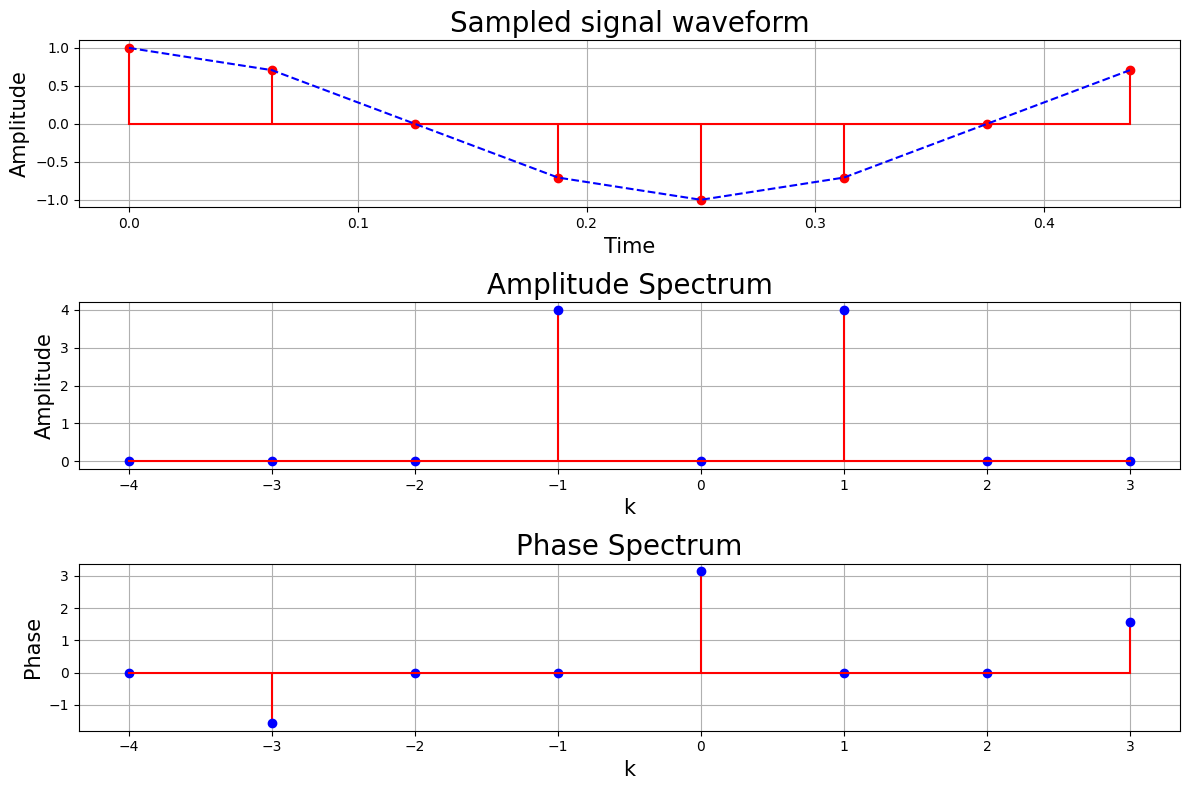

Energy in the time domain: 4.0
Energy in the frequency domain: 4.0
Parseval's theorem is verified


In [13]:
def generateSignal(N, t):
    t = np.linspace(0, t, N, endpoint=False)
    s = np.cos(4 * np.pi * t)
    return t, s

def plot_sampled_signal(t, s):
    plt.figure(figsize=(12,8))
    plt.subplot(3, 1, 1)
    plt.stem(t, s, linefmt='r-', markerfmt='ro', basefmt='r-')
    plt.plot(t, s, 'b--')
    plt.grid(True)
    plt.title('Sampled signal waveform', fontsize=20)
    plt.xlabel('Time', fontsize=15)
    plt.ylabel('Amplitude', fontsize=15)

def calculate_fft(s):
    fft = np.fft.fft(s)
    amplitude_spect = np.abs(fft)
    phase_spect = np.angle(fft)
    return amplitude_spect, phase_spect, fft

def print_parseval_verification(s, fft_result):
    energy_time_domain = np.sum(s**2)
    energy_freq_domain = np.sum(np.abs(fft_result)**2) / len(s)
    print('Energy in the time domain:', energy_time_domain)
    print('Energy in the frequency domain:', energy_freq_domain)
    print('Parseval\'s theorem is', 'verified' if np.isclose(energy_time_domain, energy_freq_domain) else 'not verified')

def plot_spectrum_Amplitude(n, amplitude_spect):
    freq = np.fft.fftfreq(n, 1/n)
    plt.subplot(3,1,2)
    plt.stem(freq, amplitude_spect, linefmt='r-', markerfmt='bo', basefmt='r-')
    plt.grid(True)
    plt.title('Amplitude Spectrum', fontsize=20)
    plt.xlabel('k', fontsize=15)
    plt.ylabel('Amplitude', fontsize=15)

def plot_spectrum_Phase(n, phase_spect):
    freq = np.fft.fftfreq(n, 1/n)
    plt.subplot(3,1,3)
    plt.stem(freq, phase_spect, linefmt='r-', markerfmt='bo', basefmt='r-')
    plt.grid(True)
    plt.title('Phase Spectrum', fontsize=20)
    plt.xlabel('k', fontsize=15)
    plt.ylabel('Phase', fontsize=15)



def plot_time_fff_algorithm(t):
    samples_arr = [2**l for l in range(3, 13)]
    times = []
    for n in samples_arr:
        avg_times = []
        _, s = generateSignal(n, t)
        for _ in range(1000):
            start = tm.time()
            calculate_fft(s)
            stop = tm.time()
            execution_time = stop - start
            avg_times.append(execution_time)
        times.append(np.mean(avg_times))

    plt.figure(figsize=(12,8))
    plt.plot(samples_arr, times, color='g', linewidth=2)
    #add here linear plot
def plot_time_fff_algorithm(t):
    samples_arr = [2**l for l in range(3, 13)]
    times = []
    for n in samples_arr:
        avg_times = []
        _, s = generateSignal(n, t)
        for _ in range(1000):
            start = tm.time()
            calculate_fft(s)
            stop = tm.time()
            execution_time = stop - start
            avg_times.append(execution_time)
        times.append(np.mean(avg_times))

    plt.figure(figsize=(12,8))
    plt.plot(samples_arr, times, color='g', linewidth=2)
    plt.title('FFT complexity', fontsize=20)
    plt.xlabel('Samples', fontsize=15)
    plt.ylabel('Time', fontsize=15)
    plt.grid(True, which="both", ls="--", linewidth=0.5)
    plt.show()



N = 8 # Samples
t = 0.5 # T0
t, s = generateSignal(N, t)
amplitude_spect, phase_spect, fft = calculate_fft(s)
plot_sampled_signal(t, s)
plot_spectrum_Amplitude(N, amplitude_spect)
plot_spectrum_Phase(N, phase_spect)
plt.tight_layout()
plt.show()
print_parseval_verification(s, fft)

Jak widzimy powyżej twierdzenie Parsevala potwierdziło się.

# b)

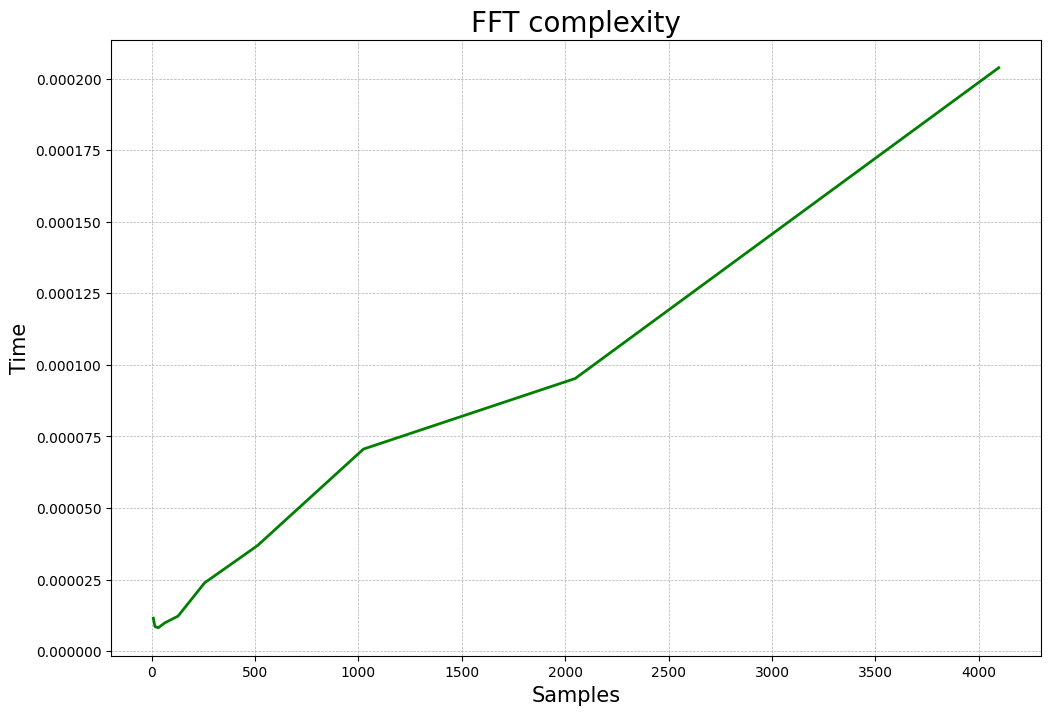

In [14]:
plot_time_fff_algorithm(t=0.5)

## Wnioski
Wykres wydaje się wskazywać na liniową złożoność obliczeniową, jednak w praktyce jest wykresem o złożoności quasi-liniowej  n * log(n). Otrzymany wykres jest bardzo podobny do wykresu o złożoności liniowej, niemniej jednak eksperyment nie zaprzecza tezie, że złożoność obliczeniowa algorytmu FFT to n * log(n).

# ZAD 2

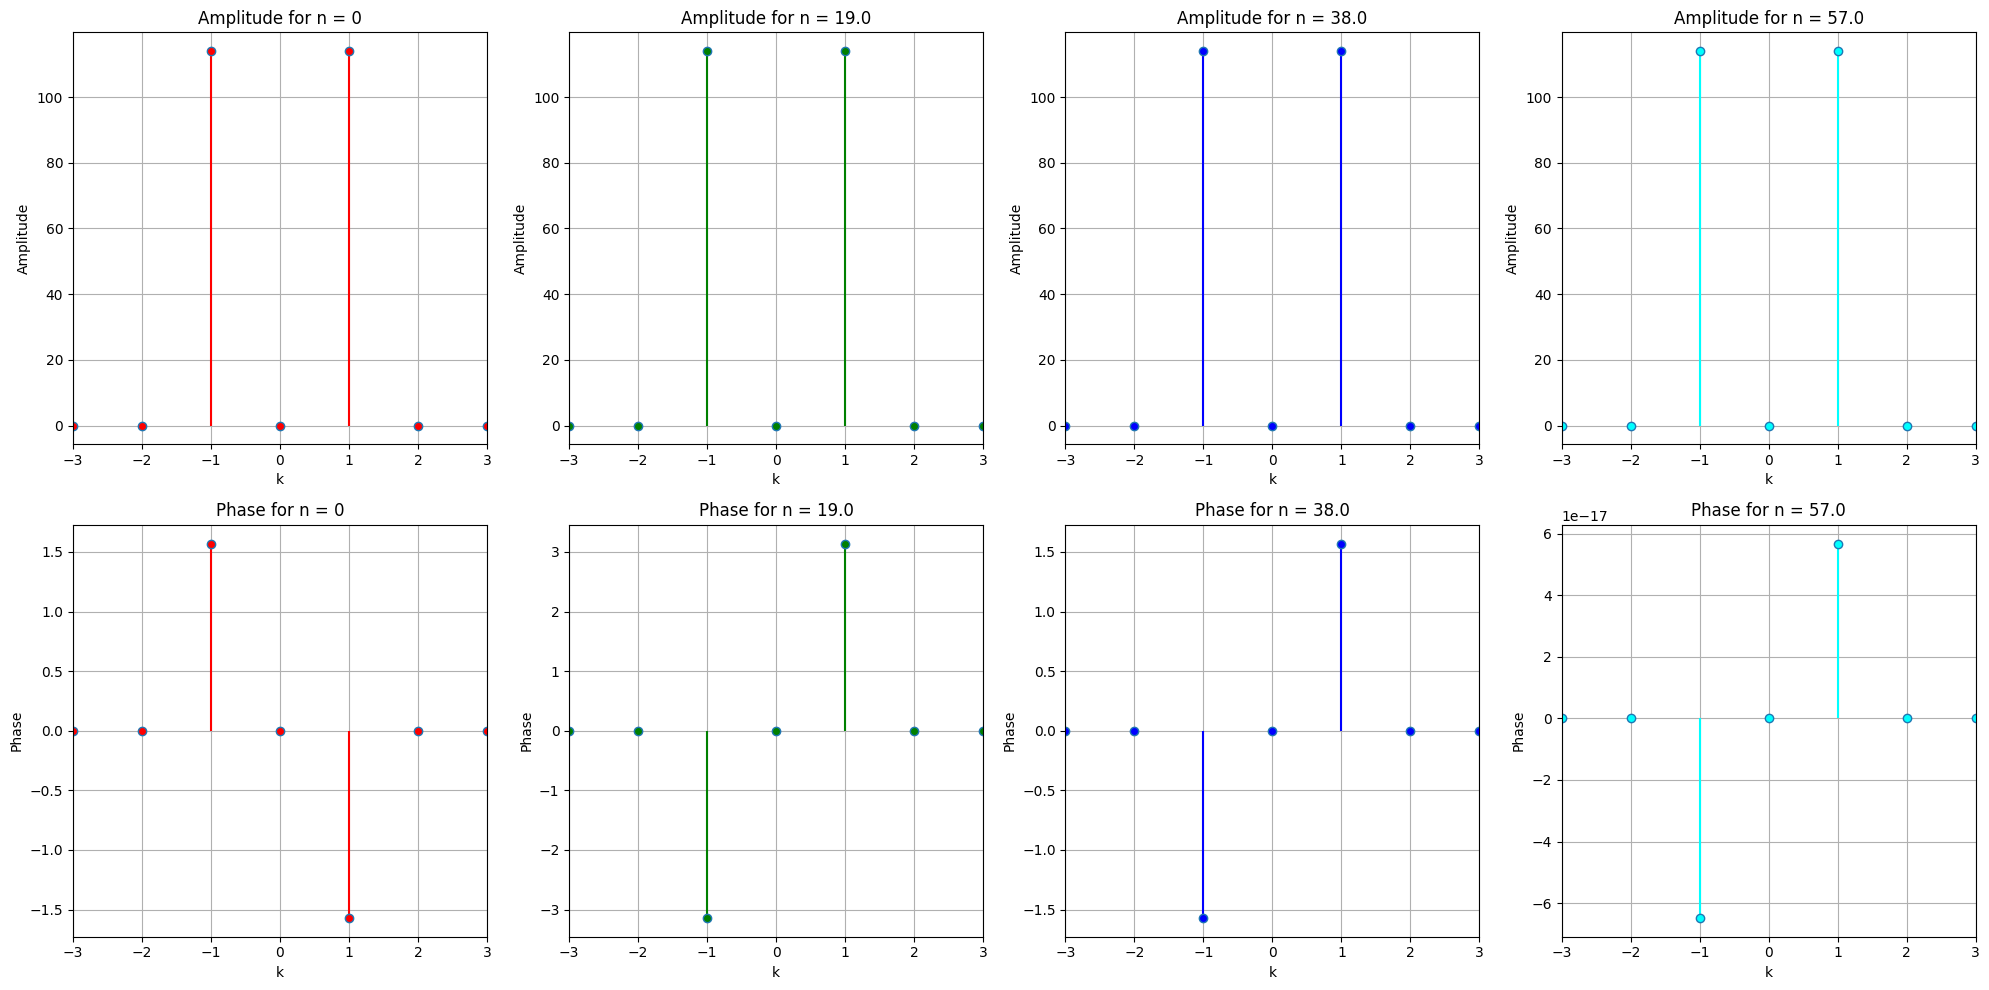

In [15]:
def filterFunction(dft_vals_to_filter: np.array) -> np.array:
    dft_vals_to_filter[np.abs(dft_vals_to_filter) < 1e-6] = 0
    filtered_array = dft_vals_to_filter
    return filtered_array

def plotShiftedSignals(nValues, N, signalFunction):
    fig, axs = plt.subplots(2, 2*len(nValues)//2, figsize=(len(nValues)*5, 10))

    for i, nValue in enumerate(nValues):
        x = np.fft.fftfreq(N, 1/N)
        y = [signalFunction(n - nValue) for n in range(N)]

        dft = np.fft.fft(y)
        dft[np.abs(dft) < 1e-10] = 0

        phase = np.angle(dft)
        amplitude = np.abs(dft)

        axs[0, i].set_title(f'Amplitude for n = {nValues[i]}')
        axs[1, i].set_title(f'Phase for n = {nValues[i]}')

        plotColors = ['red', 'green', 'blue', 'cyan']
        markerline, stemlines, _ = axs[0, i].stem(x, amplitude, basefmt=" ")
        plt.setp(markerline, 'markerfacecolor', plotColors[i])
        plt.setp(stemlines, 'color', plotColors[i])
        axs[0, i].set_xlabel("k")
        axs[0, i].set_ylabel("Amplitude")
        axs[0, i].set_xlim([-3, 3])
        axs[0, i].grid(True)

        markerline, stemlines, _ = axs[1, i].stem(x, phase, basefmt=" ")
        plt.setp(markerline, 'markerfacecolor', plotColors[i])
        plt.setp(stemlines, 'color', plotColors[i])
        axs[1, i].set_xlabel("k")
        axs[1, i].set_ylabel("Phase")
        axs[1, i].set_xlim([-3, 3])
        axs[1, i].grid(True)

    plt.tight_layout()
    plt.show()

N = 76
nValues = [0, N/4, N/2, 3*N/4]

A = 3
signalFunction = lambda n: A*np.sin(2*np.pi*n/N)

plotShiftedSignals(nValues, N, signalFunction)

## Wnioski

Przesunięcie w czasie oznacza, że widmo sygnału jest przemnożone przez pewną $e$ podniesioną do potęgi, co powoduje obrót na płaszczyźnie wokół punktu startowego osi liczbowej (pkt [0,0]). To, jak daleko jesteśmy od osi rzeczywistej na płaszczyźnie zespolonej (czyli moduł widma), nie zmienia się. Zmienia sie natomiast kąt między tym punktem a osią rzeczywistą, czyli widmo fazowe.

Kiedy czas równy jest 0, jedna czwarta, połowa lub trzy czwarte czasu całkowitego, widzimy, że punkty na wykresie widma obracają się odpowiednio o 0, $\frac{\pi}{2}$, $\pi$, $\frac{3\pi}{2}$. Jest to łatwo zauważalne na wykresach.

# ZAD 3

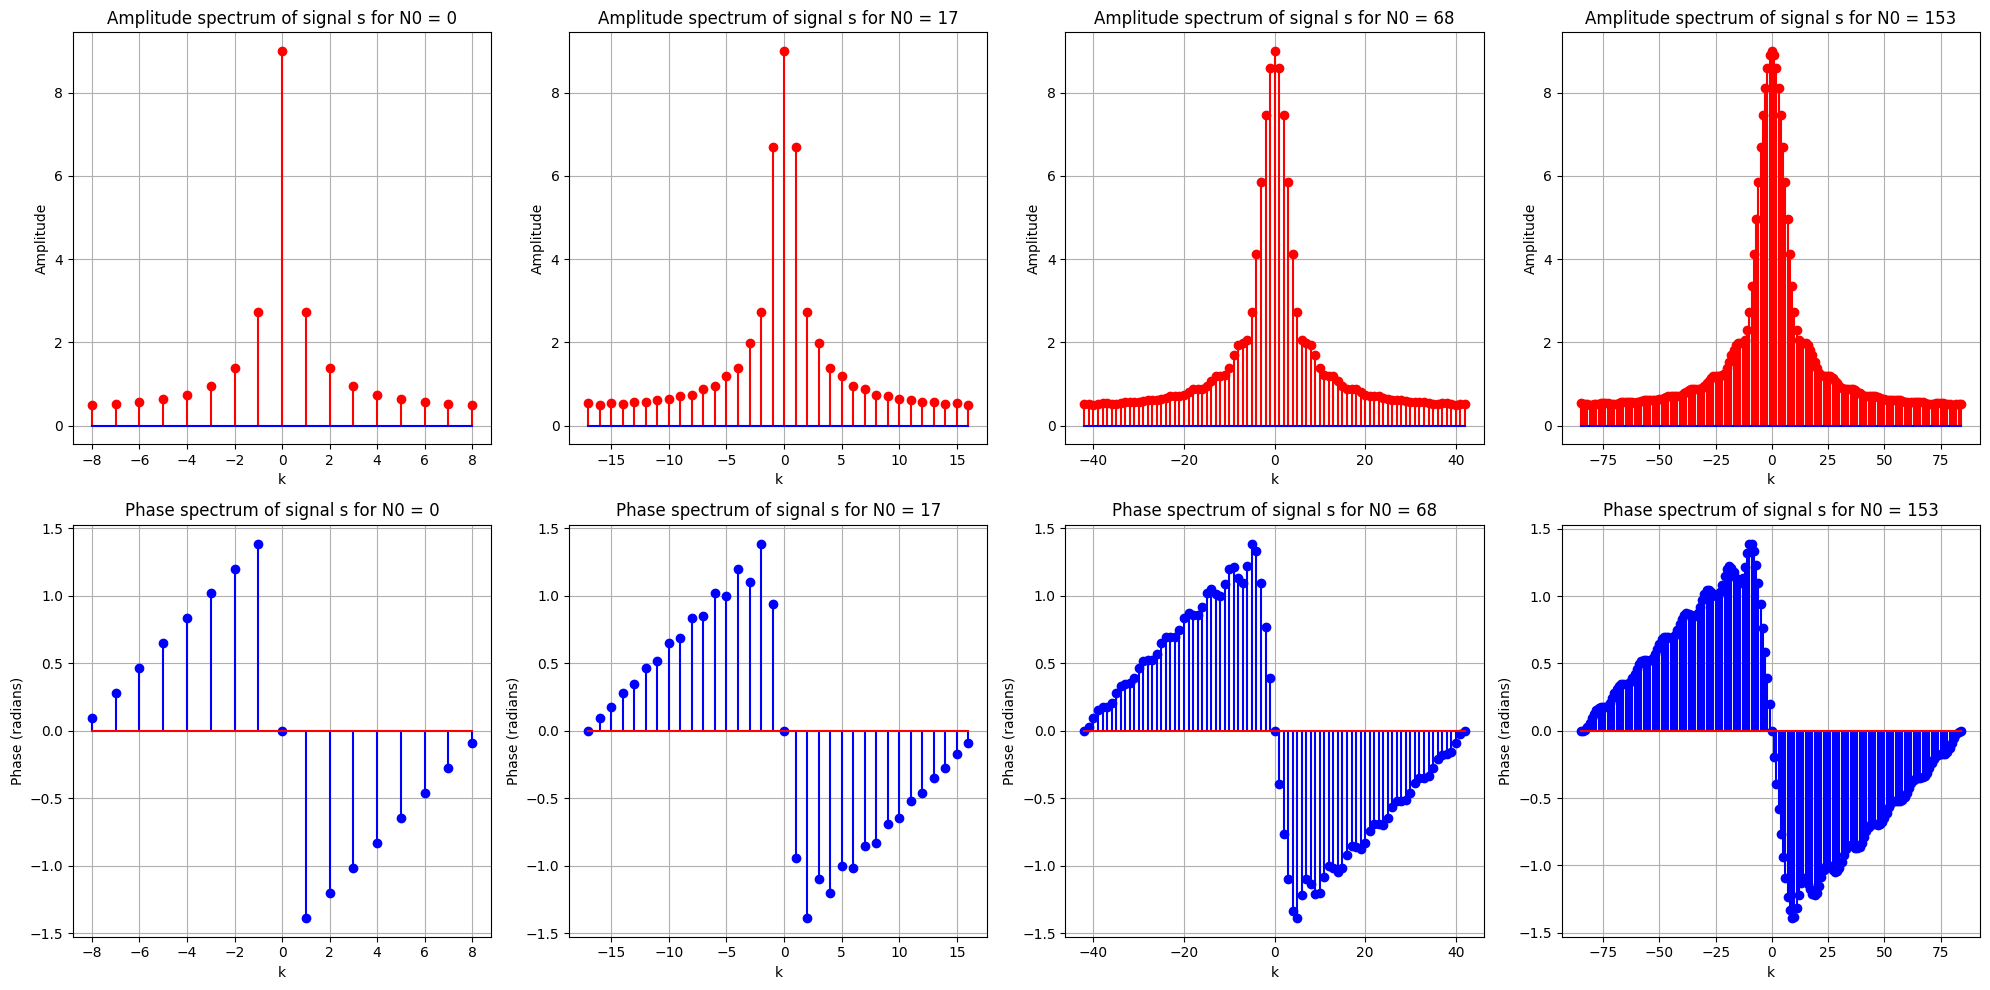

In [16]:
def plot_amplitude_phase_spectrals(N, N0, s, epsilon=1e-15):
    plt.subplots(2, len(N0), figsize=(20, 10))
    for idx, N0_value in enumerate(N0):
        values = [s(n) for n in range(N)] + [0] * N0_value # adding zeros
        dft = np.fft.fft(values)
        values = dft[:]

        phase = np.angle(dft)
        amplitude = np.abs(dft)
        x = np.fft.fftfreq(N + N0_value, 1 / (N + N0_value))
        values[np.abs(dft) < epsilon] = 0

        plt.subplot(2, len(N0), idx + 1)
        plt.title(f"Amplitude spectrum of signal s for N0 = {N0_value}")
        plt.stem(x, amplitude, linefmt='r-', markerfmt='ro', basefmt='b-')
        plt.xlabel("k")
        plt.ylabel("Amplitude")
        plt.grid(True)

        plt.subplot(2, len(N0), idx + 1 + len(N0))
        plt.title(f"Phase spectrum of signal s for N0 = {N0_value}")
        plt.stem(x, phase, linefmt='b-', markerfmt='bo', basefmt='r-')
        plt.xlabel("k")
        plt.ylabel("Phase (radians)")
        plt.grid(True)

    plt.tight_layout()
    plt.show()

N = 17
N0 = [0,1*N,4*N,9*N]
A = 1
s_n = lambda n: A*(1 - ((n % N)/N))
plot_amplitude_phase_spectrals(N, N0, s_n)

## Wnioski

Możemy zauważyć, że dodawanie zer nie daje nam zbyt wiele poza wiekszą precyzją w reprezentacji widm. Wnioskując, przy każdym zwiększeniu ilości punktów w którch obliczamy DFT otrzymujemy coraz bardziej szczegółowy wykres.

# ZAD 4

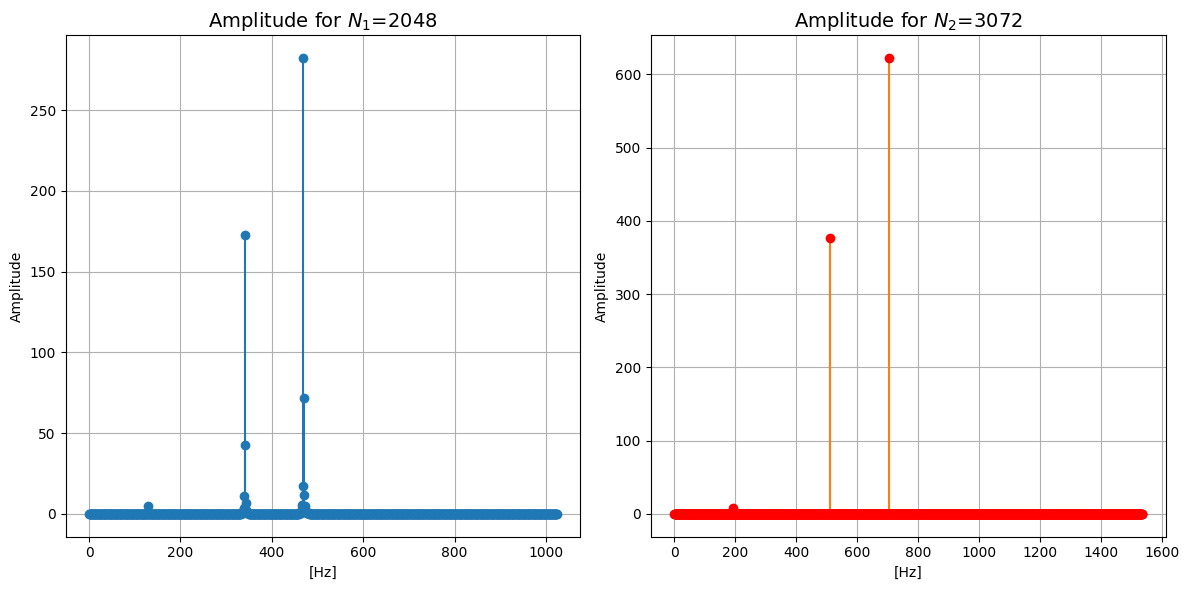

In [17]:
import numpy as np
import matplotlib.pyplot as plt

class SpectrumGenerator:
    def __init__(self, A1, F1, A2, F2, A3, F3, FS, N1, N2):
        self.A1 = A1
        self.F1 = F1
        self.A2 = A2
        self.F2 = F2
        self.A3 = A3
        self.F3 = F3
        self.FS = FS
        self.N1 = N1
        self.N2 = N2

    def generateSignal(self, N):
        func = lambda t: (self.A1 * np.sin(2 * np.pi * self.F1 * t) +
                          self.A2 * np.sin(2 * np.pi * self.F2 * t) +
                          self.A3 * np.sin(2 * np.pi * self.F3 * t))
        return [func(el) for el in np.arange(N) / self.FS]

    def plotSpectrum(self):
        signal_N1 = self.generateSignal(self.N1)
        signal_N2 = self.generateSignal(self.N2)

        fig, axs = plt.subplots(1, 2, figsize=(12, 6))

        axs[0].stem(np.abs(np.fft.rfft(signal_N1)) ** 2 / self.N1, linefmt='C0-', markerfmt='C0o', basefmt='C0-')
        axs[1].stem(np.abs(np.fft.rfft(signal_N2)) ** 2 / self.N2, linefmt='C1-', markerfmt='C1o', basefmt='C1-')

        axs[0].set_title(f"Amplitude for $N_1$={self.N1}", fontsize=14)
        axs[1].set_title(f"Amplitude for $N_2$={self.N2}", fontsize=14)


        axs[0].set_xlabel('[Hz]')
        axs[1].set_xlabel('[Hz]')


        axs[0].set_ylabel('Amplitude')
        axs[1].set_ylabel('Amplitude')



        axs[0].grid(True)
        axs[1].grid(True)


        axs[1].get_lines()[0].set_color('red')
        axs[1].get_lines()[1].set_color('red')

        plt.tight_layout()
        plt.show()

params = {
    "A1": 0.1,
    "F1": 3000,
    "A2": 0.7,
    "F2": 8000,
    "A3": 0.9,
    "F3": 11000,
    "FS": 48000,
    "N1": 2048,
    "N2": int(3/2 * 2048)
}

generator = SpectrumGenerator(**params)
generator.plotSpectrum()


## Wnioski

Największy wspólny dzielnik (NWD) częstotliwości sygnałów f1, f2, f3 wynosi 1 kHz. Sygnał będzie się powtarzał co 48 próbek, ponieważ częstotliwość próbkowania wynosi 48 kHz.

Kiedy N1 wynosi 2048, widzimy efekt przecieku widma, ponieważ liczba próbek (2048) nie jest całkowicie podzielna przez 48. Natomiast kiedy N2 wynosi 3072, co jest wielokrotnością 48, efekt przecieku widma nie występuje.